In [1]:
from sklearn.datasets import load_iris

data = load_iris().data
dataset_label = "Iris"


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

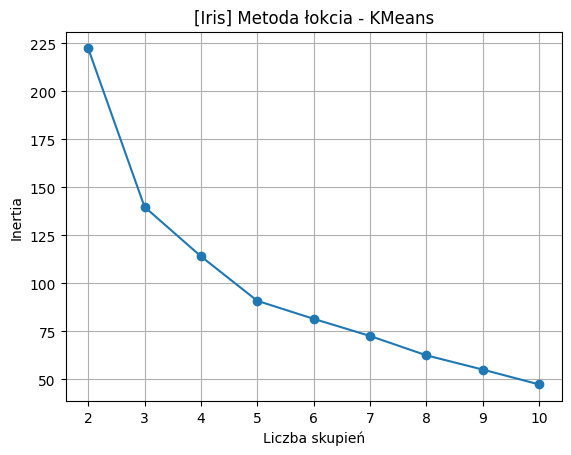

[Iris] KMeans:
 - Silhouette Score: 0.46
 - Calinski-Harabasz: 241.90
 - Davies-Bouldin: 0.83


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


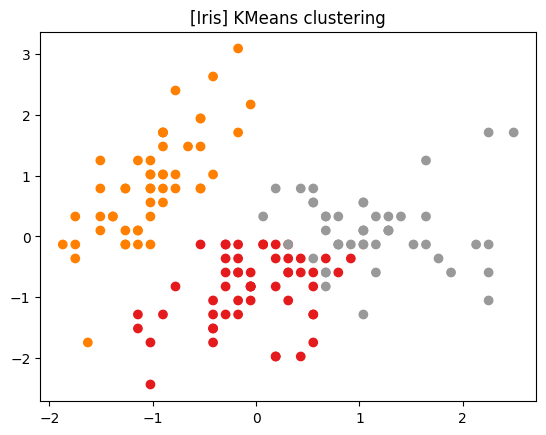

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

X = StandardScaler().fit_transform(data)

inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title(f"[{dataset_label}] Metoda łokcia - KMeans")
plt.xlabel("Liczba skupień")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)

sil_km = silhouette_score(X, labels_km)
ch_km = calinski_harabasz_score(X, labels_km)
db_km = davies_bouldin_score(X, labels_km)

print(f"[{dataset_label}] KMeans:")
print(f" - Silhouette Score: {sil_km:.2f}")
print(f" - Calinski-Harabasz: {ch_km:.2f}")
print(f" - Davies-Bouldin: {db_km:.2f}")

plt.scatter(X[:, 0], X[:, 1], c=labels_km, cmap='Set1')
plt.title(f"[{dataset_label}] KMeans clustering")
plt.show()


[Iris] DBSCAN:
 - eps=0.3 → clusters=3, silhouette=-0.19


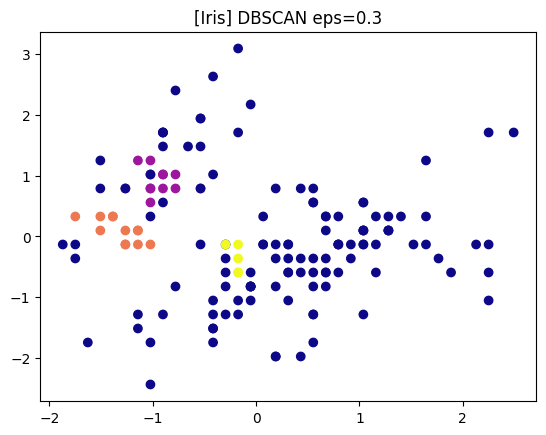

 - eps=0.5 → clusters=2, silhouette=0.36


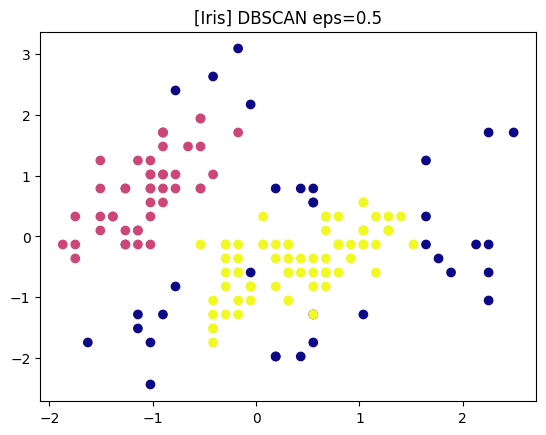

 - eps=0.7 → clusters=2, silhouette=0.52


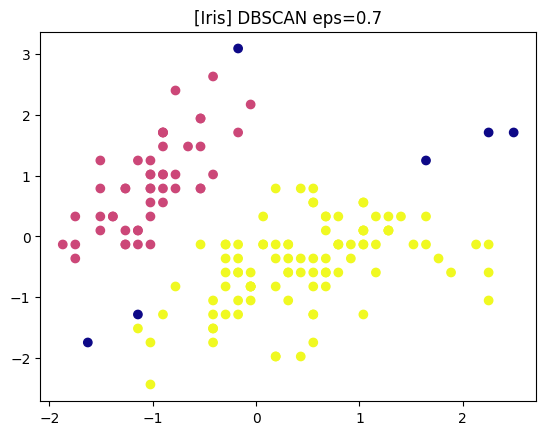

In [3]:
from sklearn.cluster import DBSCAN

print(f"[{dataset_label}] DBSCAN:")
for eps in [0.3, 0.5, 0.7]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels_db = db.fit_predict(X)
    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    if n_clusters >= 2:
        sil_db = silhouette_score(X, labels_db)
        print(f" - eps={eps} → clusters={n_clusters}, silhouette={sil_db:.2f}")
    else:
        print(f" - eps={eps} → za mało skupień ({n_clusters})")

    plt.scatter(X[:, 0], X[:, 1], c=labels_db, cmap='plasma')
    plt.title(f"[{dataset_label}] DBSCAN eps={eps}")
    plt.show()


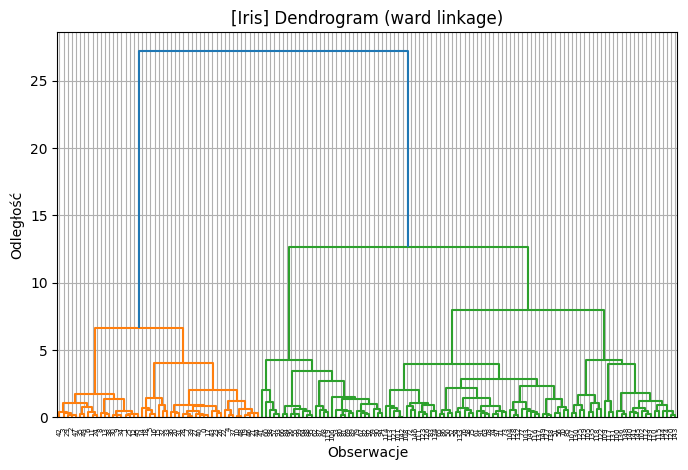

[Iris] Agglomerative Silhouette Score: 0.45


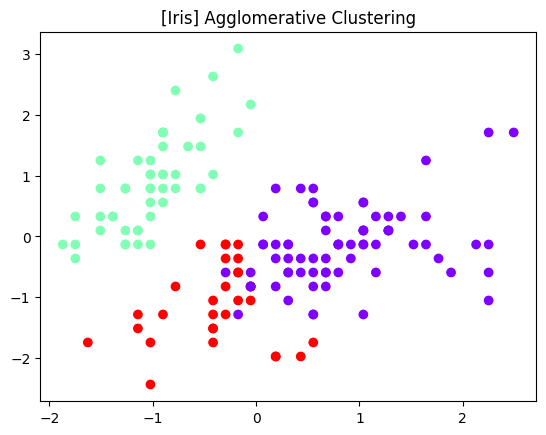

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(linked)
plt.title(f"[{dataset_label}] Dendrogram (ward linkage)")
plt.xlabel("Obserwacje")
plt.ylabel("Odległość")
plt.grid(True)
plt.show()

agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X)
sil_agg = silhouette_score(X, labels_agg)

print(f"[{dataset_label}] Agglomerative Silhouette Score: {sil_agg:.2f}")

plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='rainbow')
plt.title(f"[{dataset_label}] Agglomerative Clustering")
plt.show()


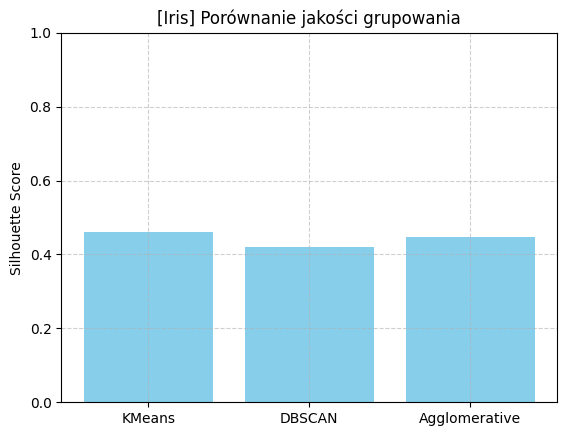

In [5]:
sil_db = 0.42

scores = [sil_km, sil_db, sil_agg]
labels = ['KMeans', 'DBSCAN', 'Agglomerative']

plt.bar(labels, scores, color='skyblue')
plt.ylabel("Silhouette Score")
plt.title(f"[{dataset_label}] Porównanie jakości grupowania")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
